In [1]:
import sys
import zipfile
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1) Extraction ZIP Spotify
# -----------------------------
zip_path = Path(r"D:\STUDIES\M1\programmation\travail_de_groupe\spotify_dernière.zip")

extract_dir = zip_path.parent / "spotify_extracted"
extract_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

print("ZIP extrait dans :", extract_dir)

# Trouver les fichiers d’historique
json_files = list(extract_dir.rglob("*.json"))
history_files = [
    f for f in json_files
    if "stream" in f.name.lower() and "history" in f.name.lower()
]

print("Fichiers d'historique trouvés :", len(history_files))
for f in history_files[:10]:
    print("-", f.name)

if not history_files:
    raise FileNotFoundError(
        "Aucun fichier d'historique trouvé (nom contenant 'stream' et 'history'). "
        "Vérifie le contenu du ZIP."
    )

# Charger et concaténer
rows = []
for f in history_files:
    try:
        data = json.loads(f.read_text(encoding="utf-8"))
    except UnicodeDecodeError:
        data = json.loads(f.read_text(encoding="utf-8-sig"))

    if isinstance(data, list):
        rows.extend(data)

df = pd.DataFrame(rows)

print("Taille brute :", df.shape)
print("Colonnes :", list(df.columns))

# Adapter au format actuel si nécessaire
if "ts" in df.columns and "ms_played" in df.columns:
    pass
elif "endTime" in df.columns and "msPlayed" in df.columns:
    df = df.rename(columns={
        "endTime": "ts",
        "msPlayed": "ms_played",
        "artistName": "master_metadata_album_artist_name",
        "trackName": "master_metadata_track_name",
        "albumName": "master_metadata_album_album_name",
    })

# -----------------------------
# 2) Export Excel
# -----------------------------
out_xlsx = zip_path.parent / "spotify_history.xlsx"
df.to_excel(out_xlsx, index=False)

print("Excel créé :", out_xlsx)
print("Taille finale :", df.shape)

ZIP extrait dans : D:\STUDIES\M1\programmation\travail_de_groupe\spotify_extracted
Fichiers d'historique trouvés : 15
- Streaming_History_Audio_2021-2022_0.json
- Streaming_History_Audio_2022-2023_6.json
- Streaming_History_Audio_2022_1.json
- Streaming_History_Audio_2022_2.json
- Streaming_History_Audio_2022_3.json
- Streaming_History_Audio_2022_4.json
- Streaming_History_Audio_2022_5.json
- Streaming_History_Audio_2023-2024_10.json
- Streaming_History_Audio_2023_7.json
- Streaming_History_Audio_2023_8.json
Taille brute : (211845, 23)
Colonnes : ['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'audiobook_title', 'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title', 'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp', 'incognito_mode']
Excel créé : D

In [1]:
import pandas as pd

df = pd.read_excel("spotify_history.xlsx")
df  # ou juste df


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-11-07T20:12:58Z,"iOS 14.8 (iPhone10,4)",192000,MA,196.117.128.247,Hope,Madd,Hope,spotify:track:4yVZ6AG6ZjZSsLvErnXajV,NaN,...,NaN,NaN,NaN,clickrow,trackdone,False,False,0.0,NaN,False
1,2021-11-07T20:15:45Z,"iOS 14.8 (iPhone10,4)",166714,MA,196.117.128.247,Noir O Cloppe,Draganov,Colors,spotify:track:0eoGmtKxA9gHaO1pBsOMlP,NaN,...,NaN,NaN,NaN,trackdone,trackdone,False,False,0.0,NaN,False
2,2021-11-07T20:16:13Z,"iOS 14.8 (iPhone10,4)",25651,MA,196.117.128.247,Pay No Mind,Madd,Pay No Mind,spotify:track:0pi2GFDC2vil6vNBnrAfIs,NaN,...,NaN,NaN,NaN,trackdone,endplay,False,False,0.0,NaN,False
3,2021-11-08T19:53:31Z,"iOS 14.8 (iPhone10,4)",62186,MA,196.117.75.185,Sucré Salé,L'morphine,Sucré Salé,spotify:track:4zYbjpZN7B298nBrKbXeyr,NaN,...,NaN,NaN,NaN,clickrow,unexpected-exit-while-paused,False,False,0.0,NaN,True
4,2021-11-08T19:54:06Z,"iOS 14.8 (iPhone10,4)",2794,MA,196.117.75.185,Sucré Salé,L'morphine,Sucré Salé,spotify:track:4zYbjpZN7B298nBrKbXeyr,NaN,...,NaN,NaN,NaN,appload,trackdone,False,False,0.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211840,2025-12-23T19:39:00Z,ios,0,FR,2a02:8434:e7ef:b101:7c7a:400c:c99a:bb26,Cobra Pretty,Valerieblud,Cobra Pretty,spotify:track:2NPVlKCmbgu3uLq55ovr1P,NaN,...,NaN,NaN,NaN,unknown,endplay,False,True,0.0,1.766519e+09,False
211841,2025-12-26T16:39:08Z,ios,825,FR,2a02:8440:8501:c1e6:8ca8:9153:b82c:7fad,N°10,Booba,N°10,spotify:track:5e2VDBmdkPziE8xhWWVyBp,NaN,...,NaN,NaN,NaN,unknown,endplay,False,True,0.0,1.766767e+09,False
211842,2025-12-26T16:39:40Z,ios,547,FR,2a02:8440:8501:c1e6:8ca8:9153:b82c:7fad,N°10,Booba,N°10,spotify:track:5e2VDBmdkPziE8xhWWVyBp,NaN,...,NaN,NaN,NaN,unknown,endplay,False,True,0.0,1.766767e+09,False
211843,2026-01-03T19:47:41Z,ios,166,MA,196.127.156.198,Mikasa,ElGrandeToto,Mikasa,spotify:track:7bgWYJvN55ydr4cfmZsLBU,NaN,...,NaN,NaN,NaN,unknown,endplay,False,True,0.0,1.767470e+09,False


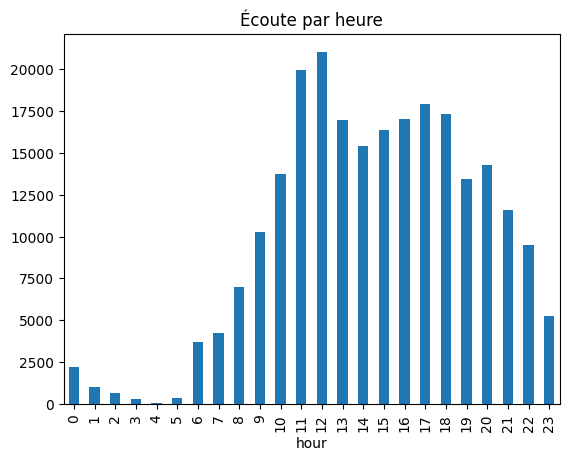

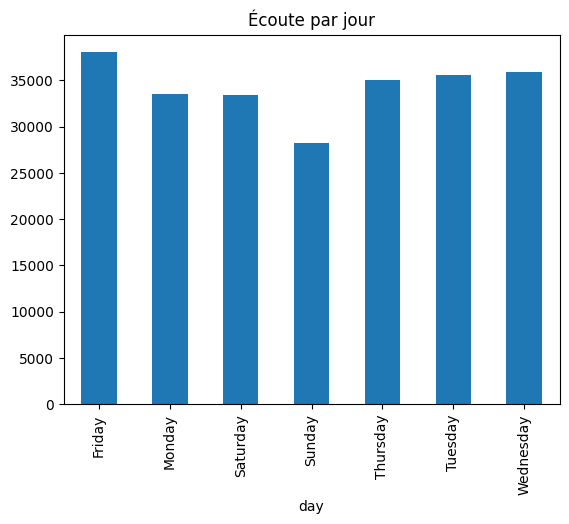

In [3]:
#habitudes temporelles
import matplotlib.pyplot as plt

# Convertir la colonne de temps
df["ts"] = pd.to_datetime(df["ts"])

# Créer les colonnes utiles
df["minutes"] = df["ms_played"] / 60000
df["hour"] = df["ts"].dt.hour
df["day"] = df["ts"].dt.day_name()

# Temps d'écoute par heure
by_hour = df.groupby("hour")["minutes"].sum()
by_hour.plot(kind="bar", title="Écoute par heure")
plt.show()

# Temps d'écoute par jour
by_day = df.groupby("day")["minutes"].sum()
by_day.plot(kind="bar", title="Écoute par jour")
plt.show()



In [4]:
#Profil général d’écoute
# Temps total écouté (en heures)
total_hours = df["minutes"].sum() / 60

# Nombre total de morceaux
total_tracks = len(df)

# Nombre d’artistes différents
unique_artists = df["master_metadata_album_artist_name"].nunique()

# Nombre de jours actifs
active_days = df["ts"].dt.date.nunique()

print("Temps total écouté (heures) :", round(total_hours, 1))
print("Nombre total de morceaux :", total_tracks)
print("Nombre d'artistes différents :", unique_artists)
print("Nombre de jours d'écoute :", active_days)


Temps total écouté (heures) : 3994.0
Nombre total de morceaux : 211845
Nombre d'artistes différents : 3009
Nombre de jours d'écoute : 1498


In [5]:
# Nombre d'écoutes par morceau
track_counts = df["master_metadata_track_name"].value_counts()

# Statistiques générales
track_counts.describe()

count    15736.000000
mean        13.450432
std         28.332401
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max        359.000000
Name: count, dtype: float64

In [6]:
top_repeated = df["master_metadata_track_name"].value_counts().head(10)
top_repeated


master_metadata_track_name
Intro                            359
Sacrifice                        331
Heartless                        305
MAFIA                            284
Less Than Zero                   273
Johnny P's Caddy                 261
Babylone                         256
Is There Someone Else?           250
Cruiser Weight Coke              234
Stairway to Heaven - Remaster    231
Name: count, dtype: int64

In [10]:
#skips: engagement d'écoute
# Un skip rapide = moins de 30 secondes d'écoute
df["quick_skip"] = df["ms_played"] < 30000
quick_skip_rate = df["quick_skip"].mean() * 100
print("Taux de skip rapide global :", round(quick_skip_rate, 2), "%")


#On considère qu’un artiste est connu si tu l’as écouté au moins 20 fois
artist_counts = df["master_metadata_album_artist_name"].value_counts()

known_artists = artist_counts[artist_counts >= 20].index

df["known_artist"] = df["master_metadata_album_artist_name"].isin(known_artists)

skip_comparison = df.groupby("known_artist")["quick_skip"].mean() * 100
skip_comparison



Taux de skip rapide global : 59.62 %


known_artist
False    62.407491
True     59.532998
Name: quick_skip, dtype: float64

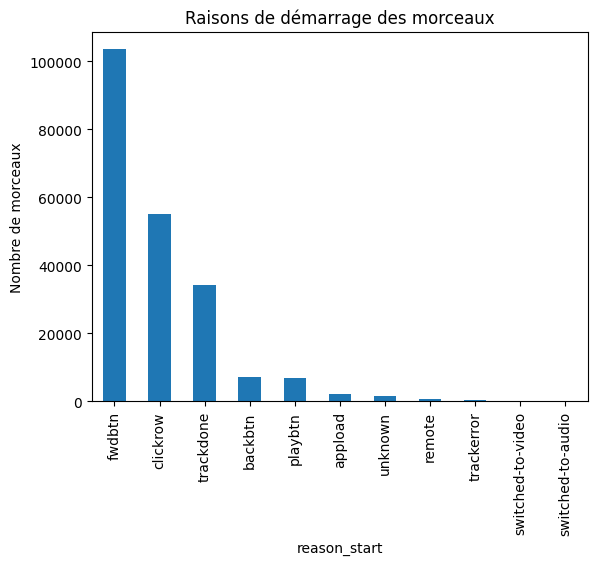

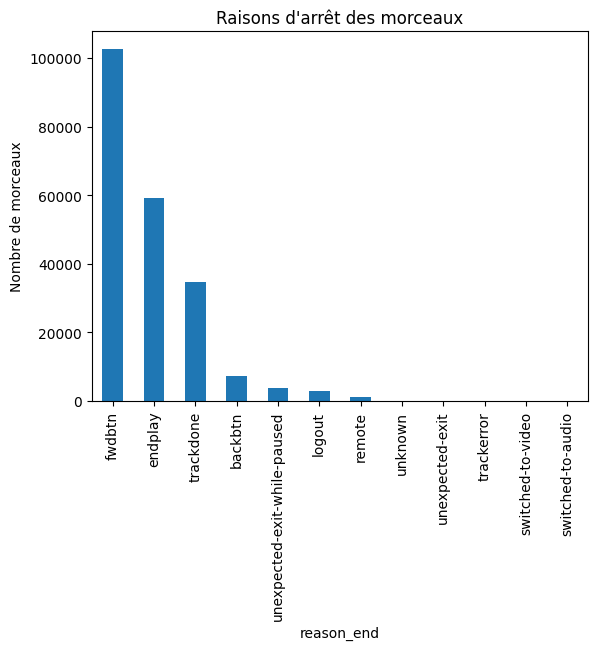

In [11]:
#graphique reason_start
start_counts = df["reason_start"].value_counts()

start_counts.plot(kind="bar", title="Raisons de démarrage des morceaux")
plt.xlabel("reason_start")
plt.ylabel("Nombre de morceaux")
plt.show()

#graphique reason_end
end_counts = df["reason_end"].value_counts()

end_counts.plot(kind="bar", title="Raisons d'arrêt des morceaux")
plt.xlabel("reason_end")
plt.ylabel("Nombre de morceaux")
plt.show()


In [12]:
#distinguer les vrais skips
true_skips = df[(df["reason_end"] == "fwdbtn") & (df["quick_skip"] == True)]
total_fwdbtn = (df["reason_end"] == "fwdbtn").sum()
real_fwdbtn = len(true_skips)

print("Nombre total de fwdbtn :", total_fwdbtn)
print("Nombre de vrais skips :", real_fwdbtn)
print("Pourcentage de vrais skips :", round(real_fwdbtn / total_fwdbtn * 100, 2), "%")


Nombre total de fwdbtn : 102585
Nombre de vrais skips : 76900
Pourcentage de vrais skips : 74.96 %


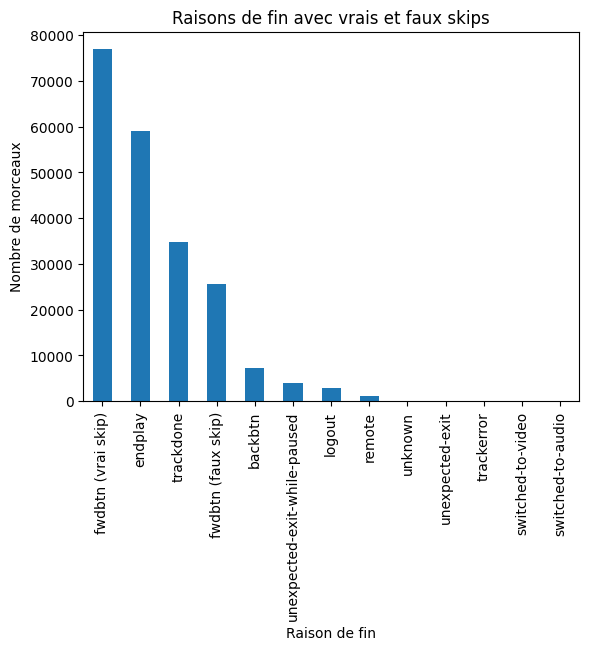

In [13]:
#graphe corrigé
# Créer une nouvelle colonne reason_end détaillée
df["reason_end_detailed"] = df["reason_end"]

# Remplacer fwdbtn par vrai / faux skip
mask_fwdbtn = df["reason_end"] == "fwdbtn"

df.loc[mask_fwdbtn & (df["quick_skip"] == True), "reason_end_detailed"] = "fwdbtn (vrai skip)"
df.loc[mask_fwdbtn & (df["quick_skip"] == False), "reason_end_detailed"] = "fwdbtn (faux skip)"

# Compter
detailed_counts = df["reason_end_detailed"].value_counts()

# Tracer le graphique
detailed_counts.plot(kind="bar", title="Raisons de fin avec vrais et faux skips")
plt.xlabel("Raison de fin")
plt.ylabel("Nombre de morceaux")
plt.show()



In [14]:
shuffle_rate = df["shuffle"].mean() * 100
print("Taux de shuffle :", round(shuffle_rate, 2), "%")


Taux de shuffle : 68.37 %


In [7]:
#indicateur de nostalgie
top10_tracks = top_repeated.index

top10_minutes = df[df["master_metadata_track_name"].isin(top10_tracks)]["minutes"].sum()
total_minutes = df["minutes"].sum()

nostalgia_score = top10_minutes / total_minutes * 100
print("Part du temps sur tes 10 morceaux préférés :", round(nostalgia_score, 2), "%")


Part du temps sur tes 10 morceaux préférés : 1.26 %


In [8]:
#Qui lance la musique : toi ou Spotify ?
start_counts = df["reason_start"].value_counts(normalize=True) * 100
start_counts

#isoler
user_starts = df["reason_start"].isin(["clickrow", "playbtn"]).mean() * 100
algo_starts = df["reason_start"].isin(["autoplay", "trackdone"]).mean() * 100

print("Démarrages par l'utilisateur :", round(user_starts, 2), "%")
print("Démarrages par Spotify :", round(algo_starts, 2), "%")


Démarrages par l'utilisateur : 29.2 %
Démarrages par Spotify : 16.2 %


In [15]:
#est-ce que spotify me propose des bons morceaux
df["algo_start"] = df["reason_start"].isin(["autoplay", "trackdone"])

df.groupby("algo_start")["quick_skip"].mean() * 100


algo_start
False    67.461131
True     19.085215
Name: quick_skip, dtype: float64